In [1]:
import pandas as pd
import numpy as np
import os

os.listdir('../data/final')

['carspeed.csv',
 'evening_test.csv',
 'evening_train.csv',
 'morning_test.csv',
 'morning_train.csv']

In [2]:
evening_train = pd.read_csv('../data/final/evening_train.csv')

In [17]:

evening_test = pd.read_csv('../data/final/evening_test.csv')

print('evening train shape : ', evening_train.shape)
print('evening test shape : ', evening_test.shape)

evening train shape :  (3005460, 39)
evening test shape :  (1288055, 39)


# train ,test

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import warnings
warnings.filterwarnings('ignore')

C:\Users\wjssm\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'evening_test')

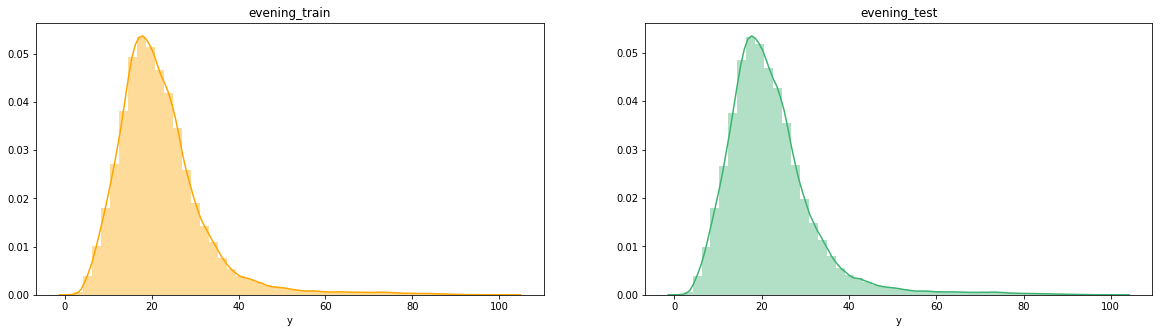

In [18]:
fig,ax = plt.subplots(1,2, figsize = (20,5))

sns.distplot(evening_train.y, ax = ax[0], color = 'Orange', norm_hist = True)

#evening_test data
sns.distplot(evening_test.y, ax = ax[1], color = 'Mediumseagreen', norm_hist = True)

ax[0].set_title('evening_train')
ax[1].set_title('evening_test')

In [19]:
del evening_test

In [25]:
evening_train.head(3)

,date,days,road_name,link_id,start_point,end_point,direction,road_length,road_num,road_type,...,PM2.5,inter_num,d1,d2,d3,d4,d_sum,severity,accident_count,y
0,20180809,목,세종대로,1000008300,광화문,세종대로사거리,상행,600,6.0,주간선도로,...,20.0,7.0,1.0,20.0,58.0,11.0,90.0,257.0,65.0,21.29
1,20181210,월,통일로,1120010600,독립문역,홍제삼거리,상행,1964,3.0,주간선도로,...,17.0,16.0,3.0,102.0,359.0,73.0,537.0,1492.0,297.0,11.97
2,20180508,화,공릉로,1060019000,먹골역,묵동성심의원,하행,636,2.0,기타도로,...,4.0,12.0,0.0,21.0,35.0,8.0,64.0,176.0,57.0,14.17


# y

In [5]:
evening_train['logy'] = np.log1p(evening_train.y)

Text(0.5, 1.0, 'log y')

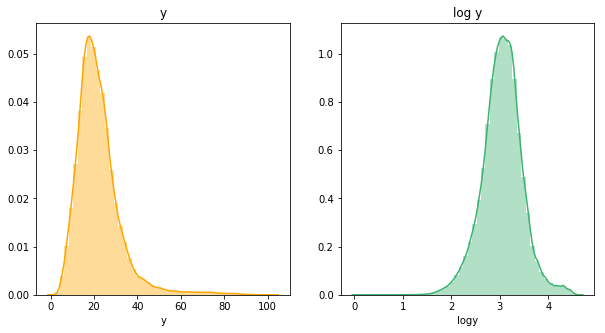

In [9]:
fig, ax = plt.subplots(1,2, figsize = (10,5))

sns.distplot(evening_train.y, ax = ax[0], color = 'Orange', norm_hist = True)
sns.distplot(evening_train.logy, ax = ax[1], color = 'Mediumseagreen', norm_hist = True)

ax[0].set_title('y')
ax[1].set_title('log y')

# 요일별

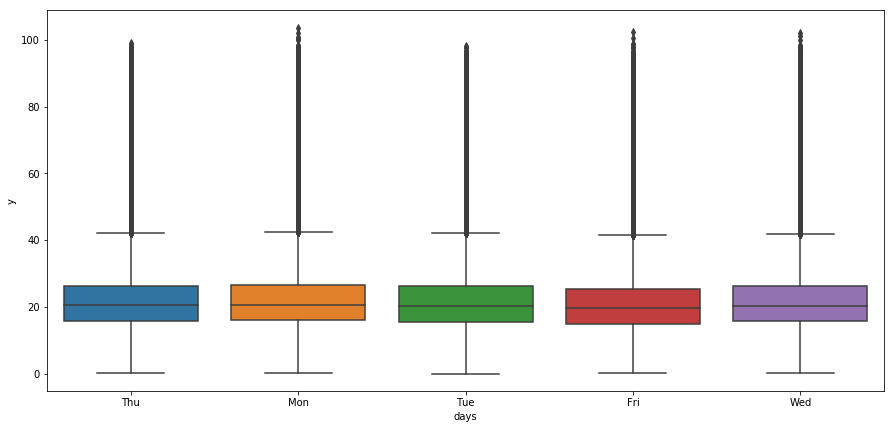

In [33]:
plt.figure(figsize = (15,7))
sns.boxplot(x="days", y="y",data = evening_train)

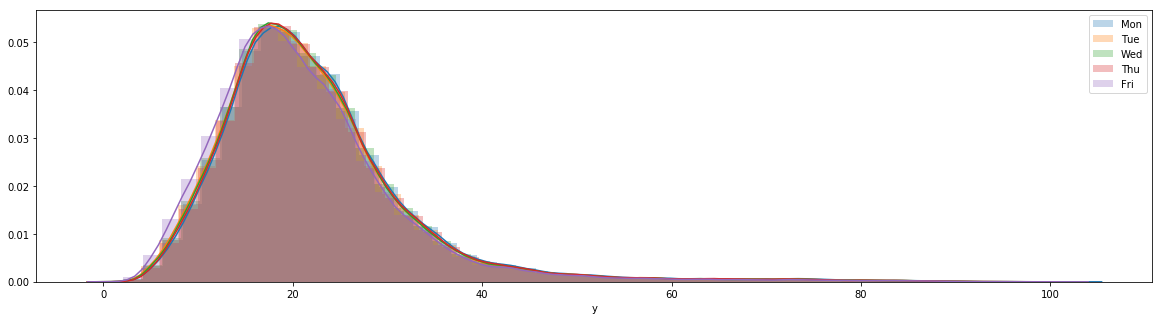

In [37]:
plt.figure(figsize = (20,5))
sns.distplot(evening_train[evening_train.days == 'Mon']['y'], label = 'Mon',hist_kws=dict(alpha=0.3))
sns.distplot(evening_train[evening_train.days == 'Tue']['y'], label = 'Tue',hist_kws=dict(alpha=0.3))
sns.distplot(evening_train[evening_train.days == 'Wed']['y'], label = 'Wed',hist_kws=dict(alpha=0.3))
sns.distplot(evening_train[evening_train.days == 'Thu']['y'], label = 'Thu',hist_kws=dict(alpha=0.3))
sns.distplot(evening_train[evening_train.days == 'Fri']['y'], label = 'Fri',hist_kws=dict(alpha=0.3))

plt.legend()

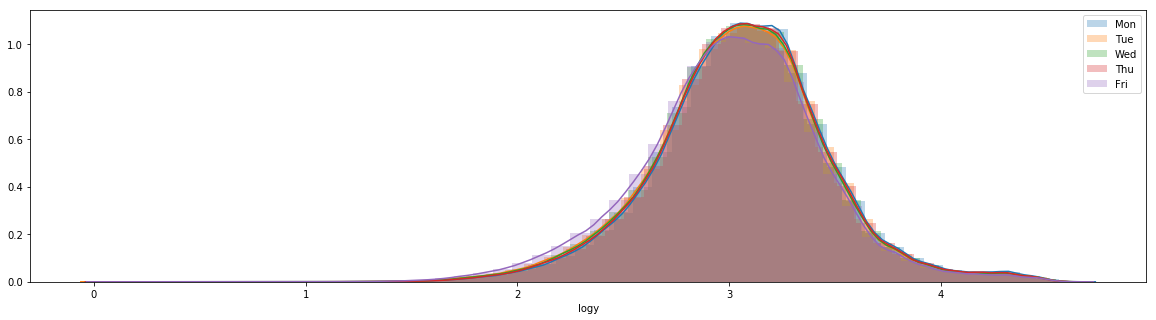

In [60]:
plt.figure(figsize = (20,5))
sns.distplot(evening_train[evening_train.days == 'Mon']['logy'], label = 'Mon',hist_kws=dict(alpha=0.3))
sns.distplot(evening_train[evening_train.days == 'Tue']['logy'], label = 'Tue',hist_kws=dict(alpha=0.3))
sns.distplot(evening_train[evening_train.days == 'Wed']['logy'], label = 'Wed',hist_kws=dict(alpha=0.3))
sns.distplot(evening_train[evening_train.days == 'Thu']['logy'], label = 'Thu',hist_kws=dict(alpha=0.3))
sns.distplot(evening_train[evening_train.days == 'Fri']['logy'], label = 'Fri',hist_kws=dict(alpha=0.3))

plt.legend()

# inter_num

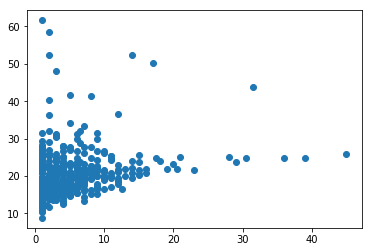

In [72]:
inter = evening_train.groupby('road_name')['inter_num', 'y'].mean()
plt.scatter(inter.inter_num, inter.y)

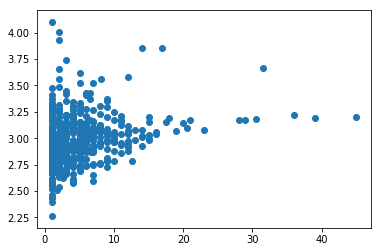

In [71]:
inter = evening_train.groupby('road_name')['inter_num', 'logy'].mean()
plt.scatter(inter.inter_num, inter.logy)

# 시간대별

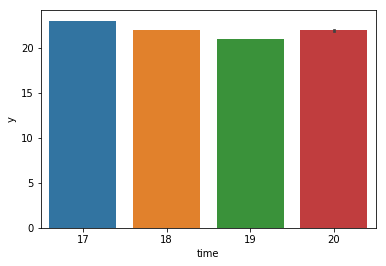

In [10]:
sns.barplot(x = 'time', y = 'y', data = evening_train)

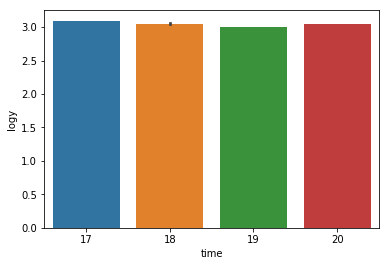

In [11]:
sns.barplot(x = 'time', y = 'logy', data = evening_train)

In [12]:
#요일별, 시간대별 평균 속도
days_time = pd.DataFrame(evening_train.groupby(['days','time'])['y'].mean())
days_time = days_time.unstack()
days_time

y                                 
time         17         18         19         20
days                                            
Fri   22.413391  21.332692  20.139212  20.871584
Mon   23.298753  22.474107  21.601547  22.563038
Thu   23.163196  22.160492  21.201725  22.368244
Tue   23.053746  22.053481  20.986390  21.927105
Wed   23.101765  22.106380  20.979485  22.000679

[]

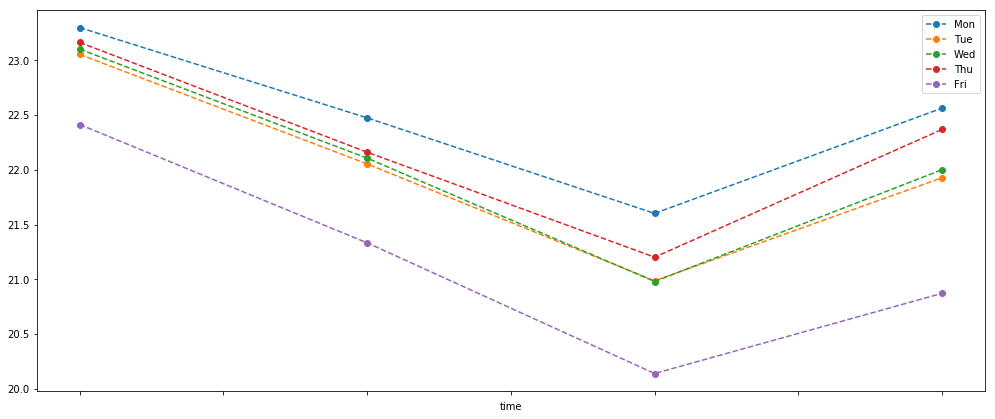

In [22]:
plt.figure(figsize=(17,7))
days_time.loc['Mon', :].plot(label = 'Mon',ls="--",marker="o")
days_time.loc['Tue', :].plot(label = 'Tue',ls="--",marker="o")
days_time.loc['Wed', :].plot(label = 'Wed',ls="--",marker="o")
days_time.loc['Thu', :].plot(label = 'Thu',ls="--",marker="o")
days_time.loc['Fri', :].plot(label = 'Fri',ls="--",marker="o")

plt.xlabel('time')
plt.legend()
plt.plot()

# 도로별

In [76]:
print('총 {}개의 도로'.format(len(evening_train.road_name.unique())))

총 460개의 도로


# 로드 length

In [22]:
link_road = pd.DataFrame(evening_train.groupby('link_id')['y','road_length'].mean()).reset_index()
link_road.head(3)

,link_id,y,road_length
0,1000000100,21.541301,306
1,1000000200,25.754220,302
2,1000000300,13.749754,325


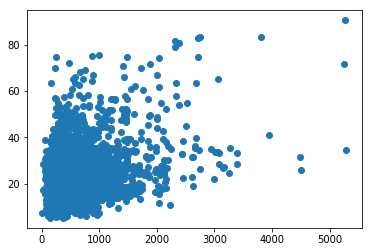

In [23]:
plt.scatter(link_road.road_length, link_road.y)

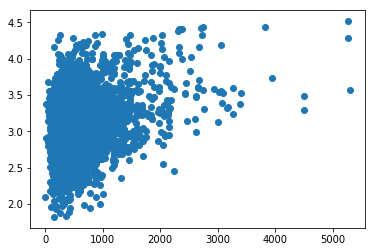

In [24]:
plt.scatter(link_road.road_length, np.log1p(link_road.y))

In [26]:
evening_train.columns

Index(['date', 'days', 'road_name', 'link_id', 'start_point', 'end_point',
       'direction', 'road_length', 'road_num', 'road_type', 'urban_suburb',
       'district', 'special', 'vacation', 'time', 'temperature', 'wind',
       'rain', 'snow', 'cctv', 'kids', 'speed_limit', 'entrance', 'signal',
       'SO2', 'CO', 'O3', 'NO2', 'PM10', 'PM2.5', 'inter_num', 'd1', 'd2',
       'd3', 'd4', 'd_sum', 'severity', 'accident_count', 'y', 'logy'],
      dtype='object')

# district

In [53]:
evening_train.district.unique()

array(['종로구', '서대문구', '중랑구', '강남구', '강동구', '성동구', '노원구', '동대문구', '영등포구',
       '성북구', '관악구', '강서구', '도봉구', '구로구', '양천구', '송파구', '동작구', '서초구',
       '중구', '용산구', '은평구', '강북구', '광진구', '금천구', '마포구'], dtype=object)

In [55]:
evening_train.district = evening_train.district.replace({'종로구' : 'Jongno-gu', '서대문구' : 'Seodaemun-gu','중랑구' : 'Jungnang-gu','강남구' : 'Gangnam-gu',
                       '강동구' : 'Gandong-gu', '성동구' : 'Seongdong-gu','노원구' : 'Nowon-gu', '동대문구' : 'Dongdaemun-gu',
                       '영등포구' : 'Yeongdeungpo-gu','성북구' : 'Seongbuk-gu', '관악구' : 'Gwanak-gu', '강서구' : 'Gangseo-gu',
                       '도봉구' : 'Dobong-gu','구로구' : 'Guro-gu', '양천구' : 'Yangcheon-gu','송파구' : 'Songpa-gu',
                       '동작구' : 'Dongjak-gu', '서초구' : 'Seocho-gu','중구' : 'Jung-gu', '용산구' : 'Yongsan-gu', 
                       '은평구' : 'Eunpyeong-gu', '강북구' : 'Gangbuk-gu', '광진구' : 'Gwangjin-gu','금천구' : 'Geumcheon-gu', '마포구' : 'Mapo-gu'})

In [56]:
#요일별, 시간대별 평균 속도
district_time = pd.DataFrame(evening_train.groupby(['district','time'])['y'].mean())
district_time = district_time.unstack()
district_time

y                                 
time                    17         18         19         20
district                                                   
Dobong-gu        21.335667  20.423965  19.586442  20.415787
Dongdaemun-gu    23.391966  22.525414  21.655997  22.691935
Dongjak-gu       23.752841  22.736898  21.486258  22.094202
Eunpyeong-gu     21.743983  20.952077  20.601733  21.280669
Gandong-gu       21.501538  20.828814  20.395955  21.190373
Gangbuk-gu       19.894053  19.453833  18.961807  19.556954
Gangnam-gu       22.538061  21.329688  19.944090  20.971083
Gangseo-gu       22.405245  21.396879  19.995929  21.137457
Geumcheon-gu     22.500760  20.752789  17.877055  19.322280
Guro-gu          24.576884  23.275391  21.865594  22.868921
Gwanak-gu        21.107764  20.153109  19.565330  19.741165
Gwangjin-gu      26.692602  25.270038  23.788110  24.748046
Jongno-gu        19.824410  19.721083  18.819821  19.769042
Jung-gu          17.062953  17.264098  16.963952  18.091711
Jungnang-gu      22.056322  21.046080  20.198092  20.394312
Mapo-gu          25.476617  24.233500  22.643226  23.595631
Nowon-gu         24.226512  23.286853  22.797666  23.871990
Seocho-gu        23.552997  22.255120  20.633925  22.211098
Seodaemun-gu     22.785915  21.707361  21.613957  22.826930
Seongbuk-gu      23.728818  22.358427  21.859527  22.749809
Seongdong-gu     25.033109  23.602553  23.315163  25.330953
Songpa-gu        23.517861  22.740014  21.829153  22.464649
Yangcheon-gu     24.054896  23.125266  22.139011  23.210244
Yeongdeungpo-gu  23.015621  22.140750  20.350300  21.077254
Yongsan-gu       25.317815  23.815359  22.127056  23.157064

[]

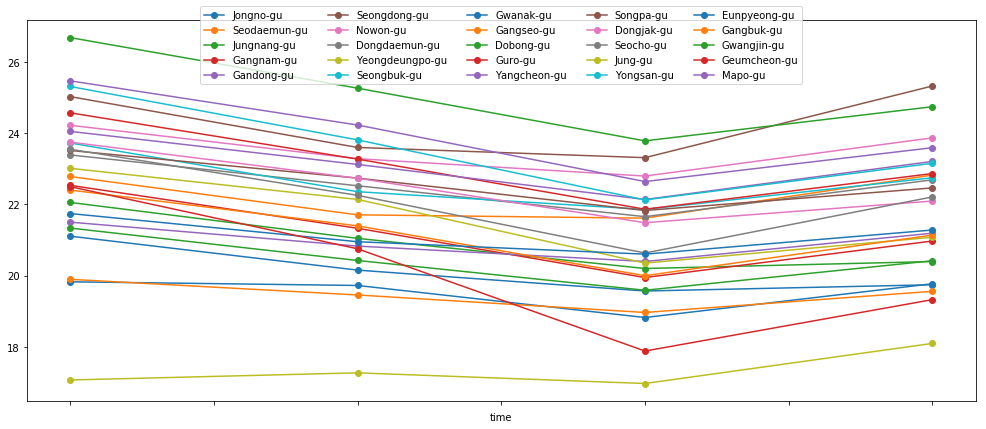

In [57]:
plt.figure(figsize=(17,7))

for dist in evening_train.district.unique() :
    district_time.loc[dist, :].plot(label = dist,marker="o")


plt.xlabel('time')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=5, fancybox=True)

plt.plot()

In [45]:
cols = ['date', 'days','special', 'vacation', 'time', 'temperature', 'wind',
       'rain', 'SO2', 'CO', 'O3', 'NO2', 'PM10', 'PM2.5', 'y','logy']
olympic = evening_train[evening_train['link_id']==1240015600][cols]

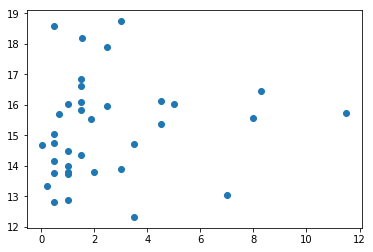

In [50]:
d1 = olympic[olympic.rain != 0]
plt.scatter(d1.rain, d1.y)

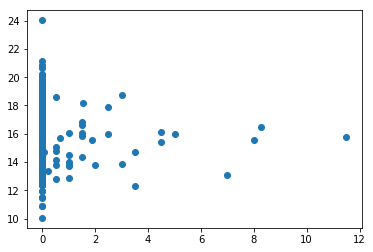

In [47]:
plt.scatter(olympic.rain, olympic.y)

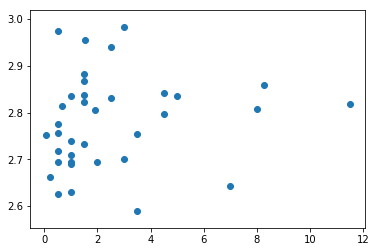

In [51]:
plt.scatter(d1.rain, d1.logy)

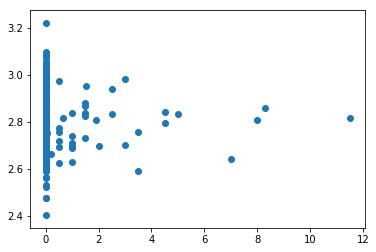

In [52]:
plt.scatter(olympic.rain, olympic.logy)